In [2]:
import pandas as pd
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=["label","message"])

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.shape

(5572, 2)

## Data Cleaning

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# check for duplicates
messages.duplicated().sum()

403

In [10]:
# remove duplicates
messages = messages.drop_duplicates(keep='first')

In [12]:
messages.duplicated().sum()

0

In [13]:
messages.shape

(5169, 2)

## Exploratory Data Analysis - EDA

In [15]:
messages['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

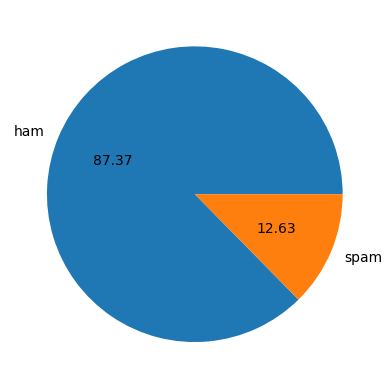

In [16]:
import matplotlib.pyplot as plt
plt.pie(messages['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [17]:
import nltk
messages['num_characters']= messages['message'].apply(len)

C:\Users\sachi\AppData\Local\Temp\ipykernel_2200\3579726317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['num_characters']= messages['message'].apply(len)


In [18]:
messages.shape

(5169, 3)

In [20]:
messages.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
messages['num_words'] = messages['message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sachi\AppData\Local\Temp\ipykernel_2200\2225583027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['num_words'] = messages['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
messages.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
messages['num_sentences'] = messages['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sachi\AppData\Local\Temp\ipykernel_2200\2253612454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['num_sentences'] = messages['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
messages.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
messages[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
messages[messages['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
messages[messages['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


plot histogram

<Axes: xlabel='num_characters', ylabel='Count'>

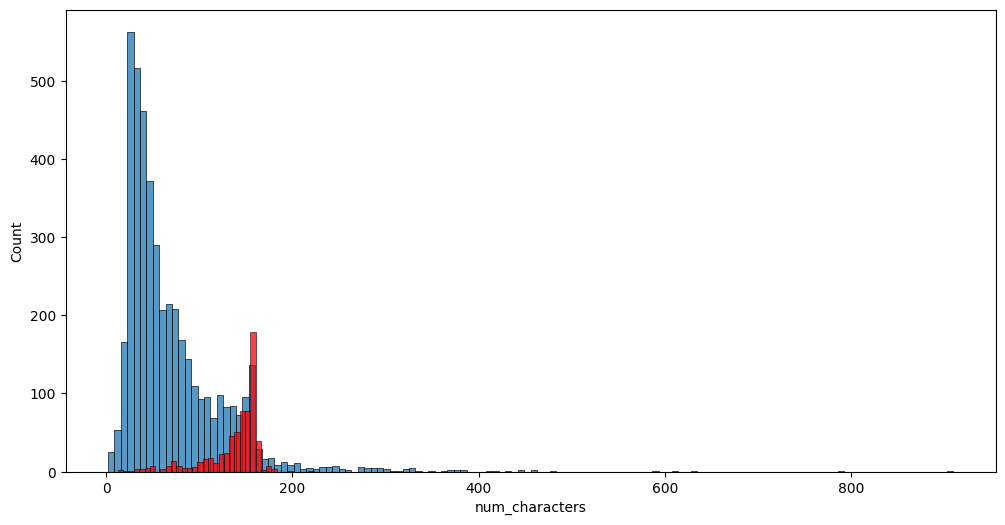

In [33]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(messages[messages['label'] == 'ham']['num_characters'])
sns.histplot(messages[messages['label'] == 'spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

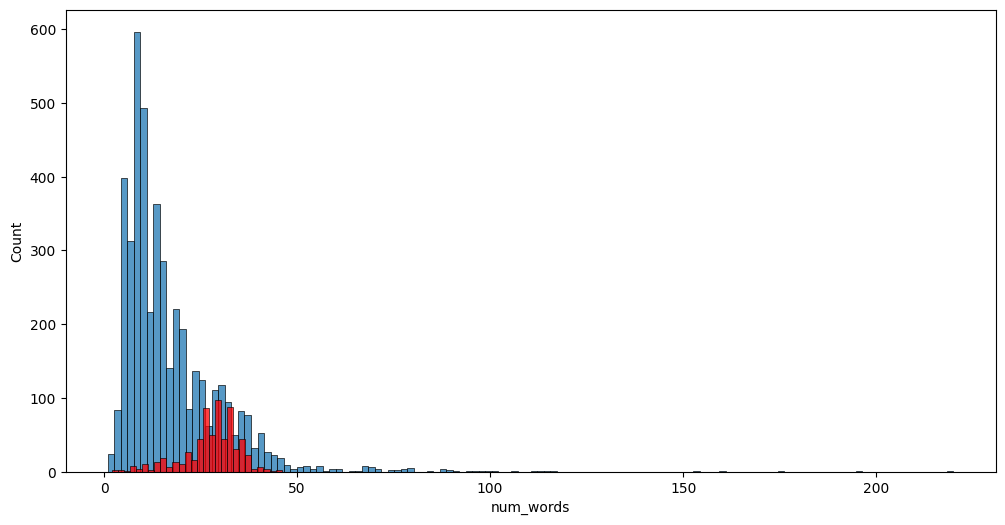

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(messages[messages['label'] == 'ham']['num_words'])
sns.histplot(messages[messages['label'] == 'spam']['num_words'],color='red')

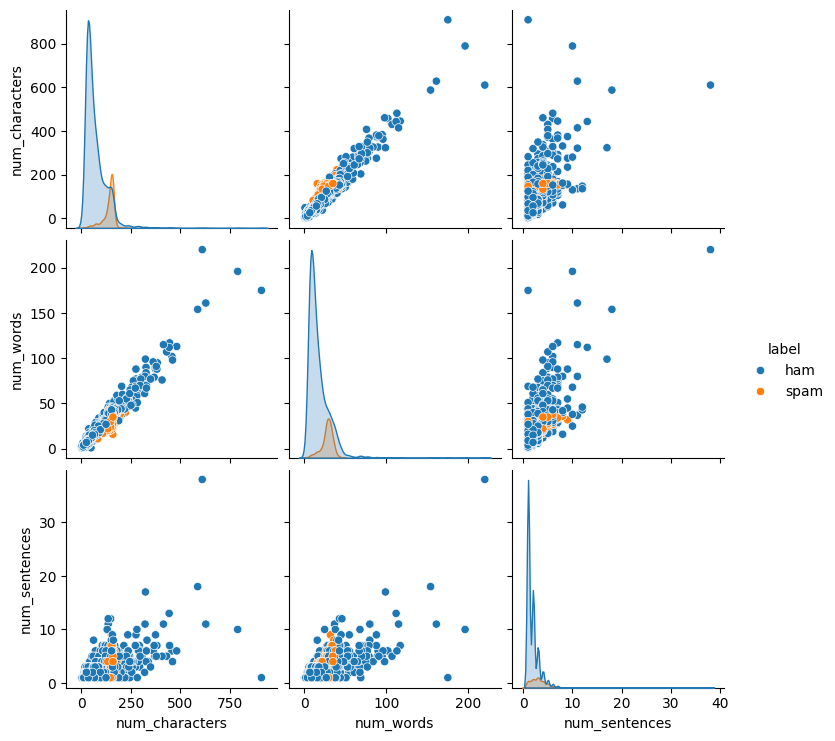

In [37]:
sns.pairplot(messages,hue='label')

## 3. Data Preprocessing

In [42]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [47]:
messages.describe

<bound method NDFrame.describe of      label                                            message  num_characters  \
0      ham  Go until jurong point, crazy.. Available only ...             111   
1      ham                      Ok lar... Joking wif u oni...              29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3      ham  U dun say so early hor... U c already then say...              49   
4      ham  Nah I don't think he goes to usf, he lives aro...              61   
...    ...                                                ...             ...   
5567  spam  This is the 2nd time we have tried 2 contact u...             160   
5568   ham               Will ü b going to esplanade fr home?              36   
5569   ham  Pity, * was in mood for that. So...any other s...              57   
5570   ham  The guy did some bitching but I acted like i'd...             125   
5571   ham                         Rofl. Its true to its name              

In [48]:
messages.shape

(5169, 5)

In [49]:
len(messages)

5169

Resetting the index because some duplicates were removed

In [69]:
messages = messages.reset_index(drop=True)  # Reset index to 0,1,2,...


In [73]:
messages.loc[103]

label                                                           ham
message           wow. You're right! I didn't mean to do that. I...
num_characters                                                  183
num_words                                                        44
num_sentences                                                     5
Name: 103, dtype: object

In [74]:
messages['message'][103]

"wow. You're right! I didn't mean to do that. I guess once i gave up on boston men and changed my search location to nyc, something changed. Cuz on my signin page it still says boston."

In [76]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [77]:
messages.shape

(5169, 5)

In [78]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

## Create Bag Of Words

In [79]:
## Output Features
y=pd.get_dummies(messages['label'])
y=y.iloc[:,0].values

In [80]:
messages

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5165,ham,Will ü b going to esplanade fr home?,36,9,1
5166,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5167,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [81]:
y

array([ True,  True, False, ...,  True,  True,  True])

In [82]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.20)

In [83]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [84]:
len(X_train),len(y_train)

(4135, 4135)

In [85]:
## independent features
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [86]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
X_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [87]:
cv.vocabulary_

{'urgent': 2283,
 'nd': 1410,
 'attempt': 94,
 'contact': 377,
 'call': 214,
 'csbcm': 429,
 'wc': 2378,
 'xx': 2468,
 'callcost': 248,
 'ppm': 1617,
 'max': 1301,
 'urgent nd': 2287,
 'nd attempt': 1411,
 'attempt contact': 95,
 'contact call': 378,
 'call csbcm': 220,
 'csbcm wc': 430,
 'wc xx': 2379,
 'right': 1755,
 'second': 1820,
 'gotta': 864,
 'hit': 954,
 'peopl': 1543,
 'first': 684,
 'thing': 2125,
 'want': 2356,
 'rememb': 1727,
 'later': 1154,
 'nope': 1452,
 'wif': 2411,
 'si': 1894,
 'lor': 1245,
 'aft': 24,
 'bath': 123,
 'dog': 537,
 'look': 1239,
 'like': 1195,
 'go': 798,
 'rain': 1682,
 'soon': 1949,
 'look like': 1241,
 'go rain': 816,
 'ok': 1478,
 'let': 1182,
 'noe': 1443,
 'leav': 1171,
 'hous': 994,
 'tell': 2088,
 'fantasi': 658,
 'min': 1327,
 'stop': 1996,
 'text': 2100,
 'rate': 1688,
 'call min': 231,
 'min stop': 1328,
 'stop text': 2005,
 'text call': 2102,
 'call nat': 234,
 'take': 2059,
 'noon': 1451,
 'make': 1284,
 'feel': 666,
 'better': 139,
 'ba

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [90]:
y_pred=spam_detect_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score,classification_report

In [92]:
accuracy_score(y_test,y_pred)

0.9796905222437138

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.94      0.89      0.92       132
        True       0.98      0.99      0.99       902

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [95]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [97]:
messages

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5165,ham,Will ü b going to esplanade fr home?,36,9,1
5166,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5167,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [101]:
# num of words
messages['num_words1'] = messages['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [102]:
messages[['num_characters','num_words1','num_sentences']].describe()

,num_characters,num_words1,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


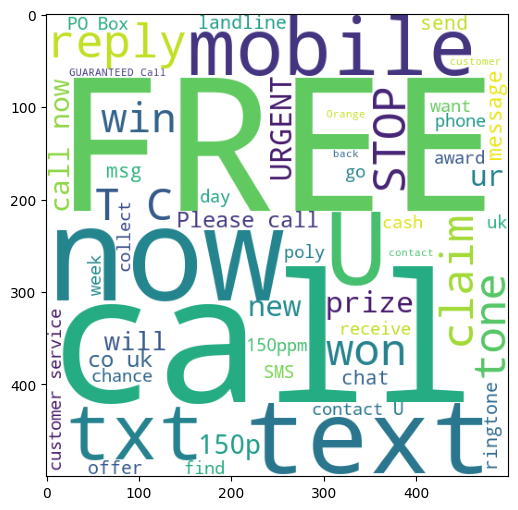

In [105]:
spam_wc = wc.generate(messages[messages['label'] == 'spam']['message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

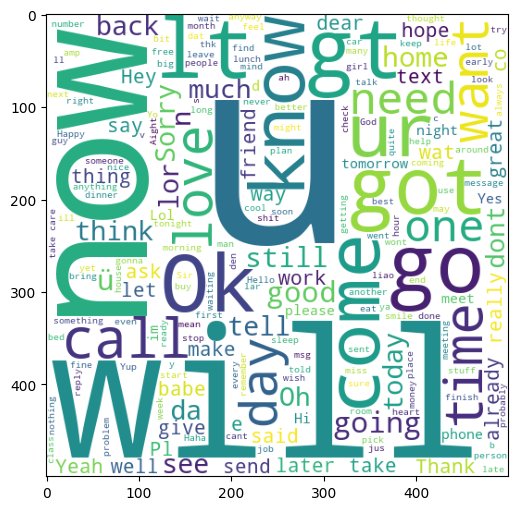

In [106]:
ham_wc = wc.generate(messages[messages['label'] == 'ham']['message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [109]:
spam_corpus = []
for msg in messages[messages['label'] == "spam"]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print("Total no. of unique words in spam messages :",len(spam_corpus))

Total no. of unique words in spam messages : 15502


In [114]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('to', 525),
 ('a', 316),
 ('your', 171),
 ('call', 163),
 ('the', 160),
 ('or', 155),
 ('for', 152),
 ('2', 151),
 ('you', 150),
 ('is', 130),
 ('Call', 116),
 ('on', 113),
 ('have', 110),
 ('from', 109),
 ('and', 102),
 ('&', 89),
 ('with', 86),
 ('ur', 86),
 ('of', 79),
 ('FREE', 75),
 ('4', 75),
 ('mobile', 71),
 ('our', 68),
 ('You', 67),
 ('are', 67),
 ('To', 65),
 ('Your', 65),
 ('claim', 63),
 ('text', 61),
 ('U', 58)]

In [127]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     525
1     316
2     171
3     163
4     160
5     155
6     152
7     151
8     150
9     130
10    116
11    113
12    110
13    109
14    102
15     89
16     86
17     86
18     79
19     75
20     75
21     71
22     68
23     67
24     67
25     65
26     65
27     63
28     61
29     58
Name: 1, dtype: int64

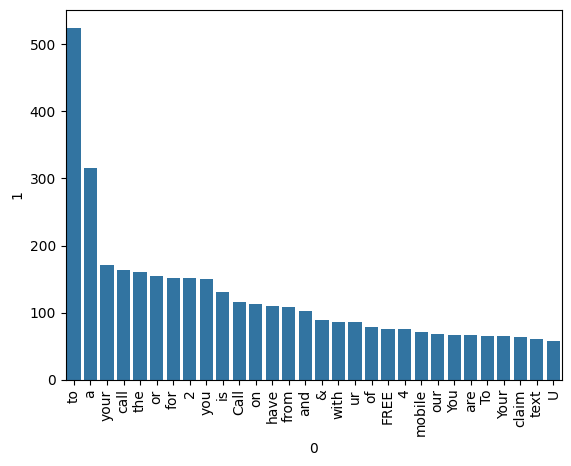

In [ ]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [128]:
ham_corpus = []
for msg in messages[messages['label'] == "ham"]['message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print("Total no. of unique words in spam messages :",len(ham_corpus))

Total no. of unique words in spam messages : 64307


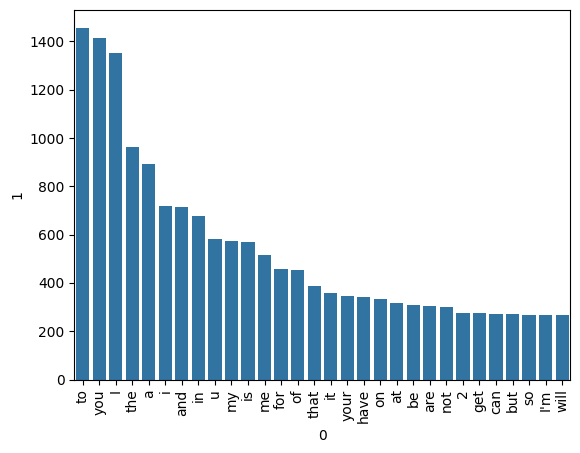

In [129]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()